<a href="https://colab.research.google.com/github/karanjakhar7/Titanic-Kaggle/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


4/2QFakFtv9p7tbKOXIcXw5HHs5cLh-UGoUEEtxvNJ9IduJTufiAkmKxY

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras

import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import numpy as np


In [ ]:
train = pd.read_csv("/content/drive/My Drive/titanic/train.csv")
test = pd.read_csv("/content/drive/My Drive/titanic/test.csv")

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train["train_test"] = 1
test["train_test"] = 0
test["Survived"] = np.NaN

In [ ]:
data = pd.concat([train, test])

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  train_test   1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 143.2+ KB


In [ ]:
data.drop(["Name", "Cabin", "Ticket"], axis = 1, inplace=True)

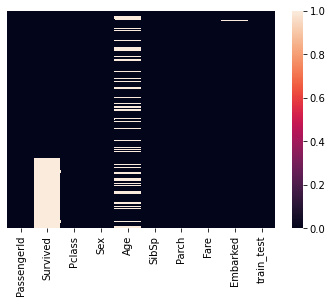

In [ ]:
sns.heatmap(data.isnull(), yticklabels=False)

In [ ]:
data['Sex'] = pd.factorize(data['Sex'])[0]

In [ ]:
data.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,train_test
0,1,0.0,3,0,22.0,1,0,7.2500,S,1
1,2,1.0,1,1,38.0,1,0,71.2833,C,1
2,3,1.0,3,1,26.0,0,0,7.9250,S,1
3,4,1.0,1,1,35.0,1,0,53.1000,S,1
4,5,0.0,3,0,35.0,0,0,8.0500,S,1
5,6,0.0,3,0,NaN,0,0,8.4583,Q,1
6,7,0.0,1,0,54.0,0,0,51.8625,S,1
7,8,0.0,3,0,2.0,3,1,21.0750,S,1
8,9,1.0,3,1,27.0,0,2,11.1333,S,1
9,10,1.0,2,1,14.0,1,0,30.0708,C,1


In [ ]:
data["Age"] = data["Age"].fillna(data["Age"].mean())

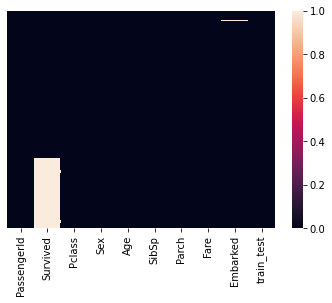

In [ ]:
sns.heatmap(data.isnull(), yticklabels=False)

In [ ]:
data["Age"] = data["Age"].round(0)

In [ ]:
data.drop("Embarked", axis = 1, inplace = True)

In [ ]:
data.head()

In [ ]:
X_train = data[data["train_test"]==1].drop(["train_test"], axis = 1)
X_test = data[data["train_test"]==0].drop(["train_test"], axis = 1)

In [ ]:
X_train.drop("PassengerId", axis = 1, inplace= True)

In [ ]:
X_train.info()

In [ ]:
output = X_test["PassengerId"]

In [ ]:
X_test.pop("Survived")

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
413   NaN
414   NaN
415   NaN
416   NaN
417   NaN
Name: Survived, Length: 418, dtype: float64

In [ ]:
X_test.drop("PassengerId", axis = 1, inplace=True)

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    int64  
 2   Age     418 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
 5   Fare    417 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 22.9 KB


0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [ ]:
Y_train = X_train.pop("Survived")

In [ ]:
Y_train = Y_train.astype(int)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    int64  
 2   Age     891 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 88.7 KB


In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((X_train.values, Y_train.values))

In [ ]:
for feat, targ in dataset.take(5):
  print ('Features: {}, Target: {}'.format(feat, targ))

Features: [ 3.    0.   22.    1.    0.    7.25], Target: 0
Features: [ 1.      1.     38.      1.      0.     71.2833], Target: 1
Features: [ 3.     1.    26.     0.     0.     7.925], Target: 1
Features: [ 1.   1.  35.   1.   0.  53.1], Target: 1
Features: [ 3.    0.   35.    0.    0.    8.05], Target: 0


In [ ]:
all_dataset = dataset.shuffle(len(X_train)).batch(1)

In [ ]:
split = int(0.85*len(X_train))

In [ ]:
validation_dataset = all_dataset.take(split) 
train_dataset = all_dataset.skip(split)

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer="adam", loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs= 100, validation_data=validation_dataset, batch_size = 16)

In [ ]:
import matplotlib.pyplot as plt

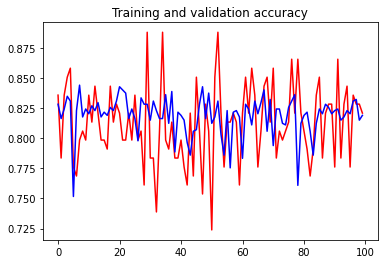

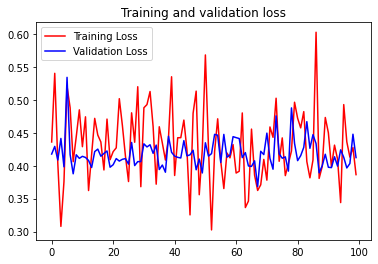

In [ ]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
prediction = model.predict(X_test)

In [ ]:
prediction.shape

(418, 1)

In [ ]:
type(prediction)

numpy.ndarray

In [ ]:
prediction

In [ ]:
prediction[prediction > 0.5] = 1
prediction[prediction < 0.5] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


In [ ]:
prediction[np.isnan(prediction)] = 0

In [ ]:
prediction.shape

(418, 1)

In [ ]:
prediction = prediction.astype(int)

In [ ]:
output.shape

(418,)

In [ ]:
pred = pd.DataFrame(prediction, columns=["Survived"])

In [ ]:
pred.head(20)

In [ ]:
output.to_frame()

In [ ]:
final = pd.concat([output.to_frame(), pred], axis= 1)

In [ ]:
final

In [ ]:
final.to_csv("predictions.csv", index=False)